In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df=pd.read_csv("/content/Dataset (1).csv")
df.head(5)

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df.shape

(19020, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000


In [6]:
df.isnull().sum()

,0
fLength,0
fWidth,0
fSize,0
fConc,0
fConc1,0
fAsym,0
fM3Long,0
fM3Trans,0
fAlpha,0
fDist,0


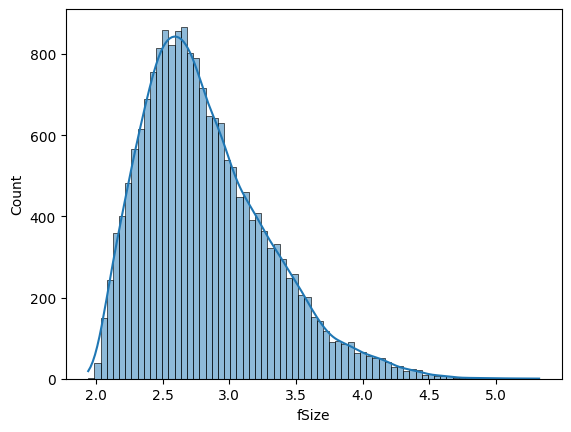

In [7]:
sns.histplot(data=df, x="fSize", kde=True)
plt.show()

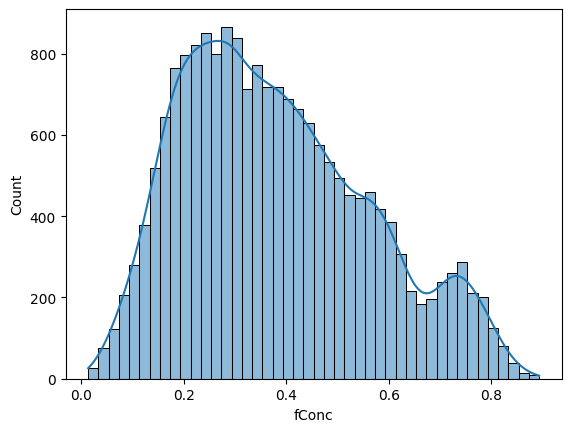

In [8]:
sns.histplot(data=df, x="fConc", kde=True)
plt.show()

<Axes: >

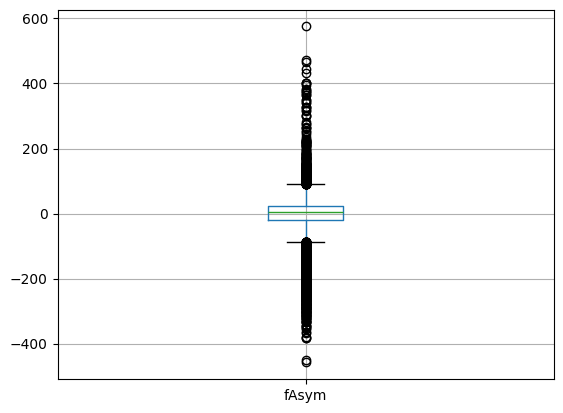

In [9]:
df.boxplot( column =['fAsym'], grid = True)

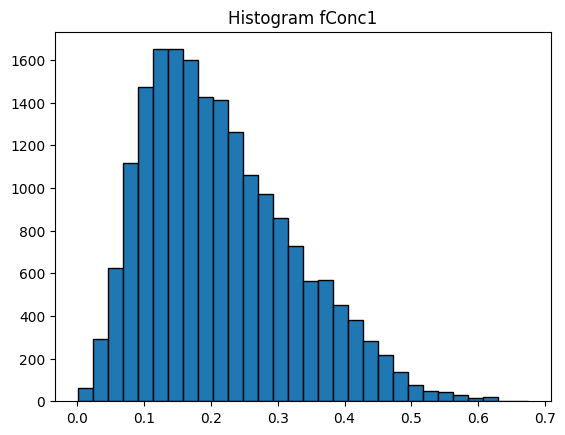

In [11]:
plt.hist(df['fConc1'], bins=30, edgecolor='black')
plt.title('Histogram fConc1')
plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

X = df.drop(["fSize", "class"], axis=1)

y = df["fSize"]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)


print("Actual:", list(y[:13]))

Actual: [2.6449, 2.5185, 4.0612, 2.3385, 3.1611, 2.9085, 3.0332, 2.5521, 4.154, 2.5786, 3.3331, 2.4385, 3.0441]


In [16]:
from sklearn.linear_model import LinearRegression

X = df.drop(["fWidth", "class"], axis=1)

y = df["fWidth"]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

print("Actual:", list(y[:10]))

Actual: [16.0021, 11.7235, 136.031, 9.5728, 30.9205, 21.1502, 17.3565, 13.7595, 46.5165, 15.1993]


In [19]:
from sklearn.linear_model import LinearRegression

X = df.drop(["fConc1", "class"], axis=1)

y = df["fConc1"]

model = LinearRegression()

model.fit(X, y)

y_pred = model.predict(X)

print("Actual:", list(y[:12]))

Actual: [0.1982, 0.3773, 0.0187, 0.3922, 0.1832, 0.134, 0.1515, 0.2174, 0.039, 0.1913, 0.1261, 0.2933]


Feature Scaling :StandardScaler || MinMaxScaler.

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler
scaler_standard = StandardScaler()
fConc1_standard = scaler_standard.fit_transform(df[["fConc1"]])

print("StandardScaler:", fConc1_standard[:10])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
fConc1_minmax = scaler_minmax.fit_transform(df[["fConc1"]])
print("MinMaxScaler:", fConc1_minmax[:10])

StandardScaler: [[-0.14892271]
 [ 1.471776  ]
 [-1.77324106]
 [ 1.60660799]
 [-0.28465962]
 [-0.72987668]
 [-0.57151695]
 [ 0.02482054]
 [-1.58954378]
 [-0.21136168]]
MinMaxScaler: [[0.29322863]
 [0.55860127]
 [0.0272633 ]
 [0.58067862]
 [0.27100311]
 [0.19810342]
 [0.22403319]
 [0.32167729]
 [0.05734183]
 [0.28300489]]


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler
scaler_standard = StandardScaler()
fConc1_standard = scaler_standard.fit_transform(df[["fAsym"]])

print("StandardScaler:", fConc1_standard[:8])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
fConc1_minmax = scaler_minmax.fit_transform(df[["fAsym"]])
print("MinMaxScaler:", fConc1_minmax[:5])

StandardScaler: [[ 0.54104236]
 [ 0.51691919]
 [ 2.04499208]
 [ 0.53277103]
 [-0.0202004 ]
 [ 0.93249398]
 [ 0.21796897]
 [ 0.57370034]]
MinMaxScaler: [[0.47003175]
 [0.46864939]
 [0.5562148 ]
 [0.46955777]
 [0.43787003]]


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# StandardScaler
scaler_standard = StandardScaler()
fConc1_standard = scaler_standard.fit_transform(df[["fAlpha"]])

print("StandardScaler:", fConc1_standard[:6])

# MinMaxScaler
scaler_minmax = MinMaxScaler()
fConc1_minmax = scaler_minmax.fit_transform(df[["fAlpha"]])
print("MinMaxScaler:", fConc1_minmax[:7])

StandardScaler: [[ 0.47681587]
 [-0.81541816]
 [ 1.88922413]
 [-0.65880358]
 [-0.88103914]
 [-0.92068985]]
MinMaxScaler: [[0.44546667]
 [0.07067667]
 [0.85511111]
 [0.1161    ]
 [0.05164444]
 [0.04014444]
 [0.05324444]]


Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["fConc1"]]
y = df["class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)


intercept = log_reg.intercept_[0]
coef = log_reg.coef_[0][0]

print("Intercept ", intercept)
print("Coefficient for fConc1: ", coef)

Intercept  -0.5847107036505377
Coefficient for fConc1:  -0.12570061664773244


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["fAsym"]]
y = df["class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)


intercept = log_reg.intercept_[0]
coef = log_reg.coef_[0][0]

print("Intercept : ", intercept)
print("Coefficient for fAsym : ", coef)

Intercept :  -0.655436641971077
Coefficient for fAsym :  -0.00666470128876951


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["fDist"]]
y = df["class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


log_reg = LogisticRegression(max_iter=1000, random_state=0)
log_reg.fit(X_train, y_train)


intercept = log_reg.intercept_[0]
coef = log_reg.coef_[0][0]

print("Intercept : ", intercept)
print("Coefficient for fDist : ", coef)

Intercept :  -0.9875525056228807
Coefficient for fDist :  0.0019264213369899954
